In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
FILENAME = '/Users/santithamananwattanaporn/Documents/code/my_sql/truetown/model/source/wongnai.csv'
OUTPUT_FILE = '/Users/santithamananwattanaporn/Documents/code/my_sql/truetown/model/output/kmean_result.csv'

In [3]:
df = pd.read_csv(FILENAME)

In [4]:
#min max value
print('Min Rating: {}'.format(df['rating'].min()))
print('Max Rating: {}'.format(df['rating'].max()))
print('Min No. Rating: {}'.format(df['no_of_rating'].min()))
print('Max No. Rating: {}'.format(df['no_of_rating'].max()))
print('Min Rank No.: {}'.format(df['rank_no'].min()))
print('Max Rank No.: {}'.format(df['rank_no'].max()))
print('Min Rank Total: {}'.format(df['rank_total'].min()))
print('Max Rank Total: {}'.format(df['rank_total'].max()))

Min Rating: 1.0
Max Rating: 5.0
Min No. Rating: 1
Max No. Rating: 1174
Min Rank No.: 0
Max Rank No.: 500
Min Rank Total: 0
Max Rank Total: 16539


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109015 entries, 0 to 109014
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   key               109015 non-null  int64  
 1   name              109014 non-null  object 
 2   rating            109015 non-null  float64
 3   no_of_rating      109015 non-null  int64  
 4   category          109015 non-null  object 
 5   rank_no           109015 non-null  int64  
 6   rank_total        109015 non-null  int64  
 7   rank_name         91917 non-null   object 
 8   price_range_name  109015 non-null  object 
 9   price_range_rank  109015 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 8.3+ MB


# EDA

In [8]:
price_index = [
    '1.) <100', 
    '2.) 101-250', 
    '3.) 251-500', 
    '4.) 501-1000',
    '5.) >1000',
    'Unknown'
]
price_df = df[['price_range_name']].fillna('Unknown')
price_df = price_df.groupby('price_range_name')['price_range_name'].count()
price_df = price_df.reindex(price_index)

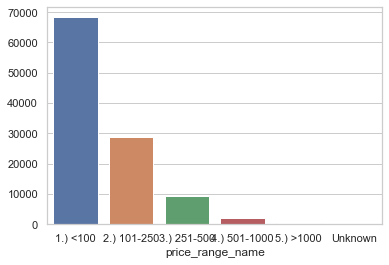

In [9]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=price_df.index, y=price_df.values)

In [10]:
df['rating_bin'] = pd.cut(df['rating'], bins=8)
rating_df = df.groupby('rating_bin')['rating_bin'].count()

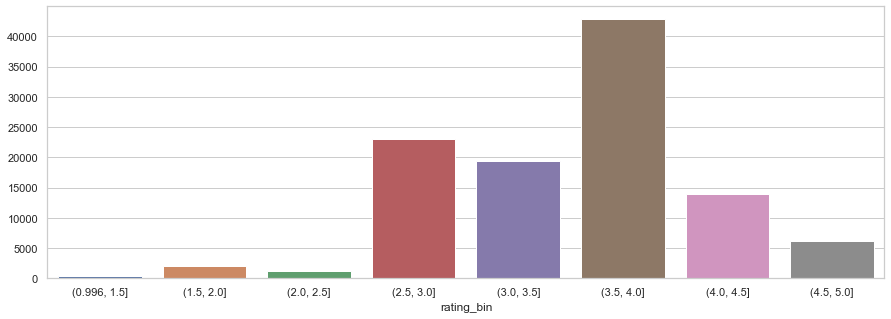

In [11]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,5))
ax = sns.barplot(x=rating_df.index, y=rating_df.values)

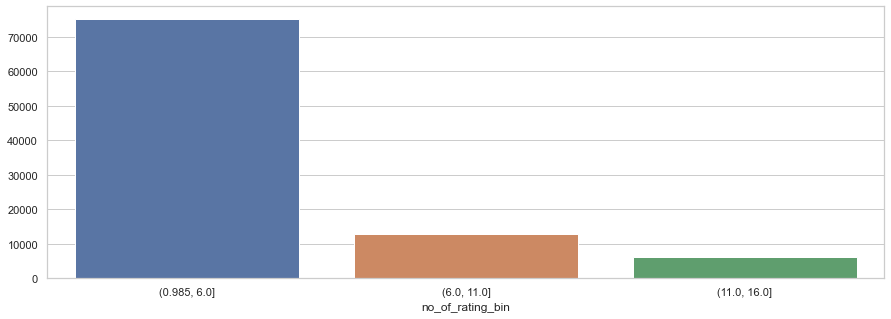

In [33]:
df['no_of_rating_bin'] = pd.cut(df[(df['no_of_rating'] < 17)]['no_of_rating'], bins=3)
no_rating_df = df.groupby('no_of_rating_bin')['no_of_rating_bin'].count()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,5))
ax = sns.barplot(x=no_rating_df.index, y=no_rating_df.values)

# Kmean

In [34]:
selected_column = [
    'rating',
    'no_of_rating',
#     'price_range_rank'
]

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.loc[:,selected_column])
scale_df = scaler.transform(df.loc[:,selected_column])

In [36]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(scale_df)
    wcss.append(kmeans.inertia_)

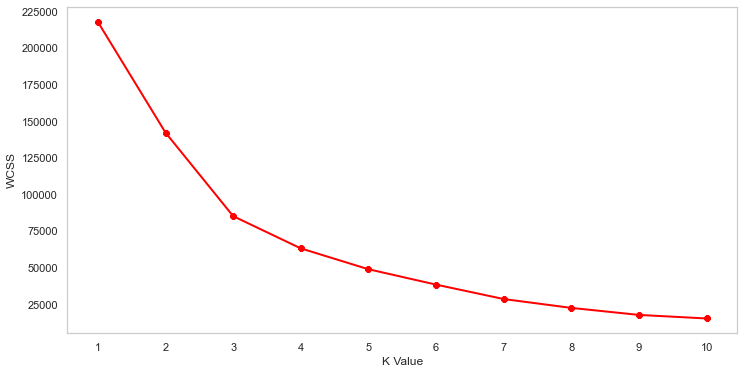

In [37]:
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [38]:
n_clusters = 5
km = KMeans(n_clusters=n_clusters, init='k-means++')
clusters = km.fit_predict(scale_df)
df['label'] = clusters

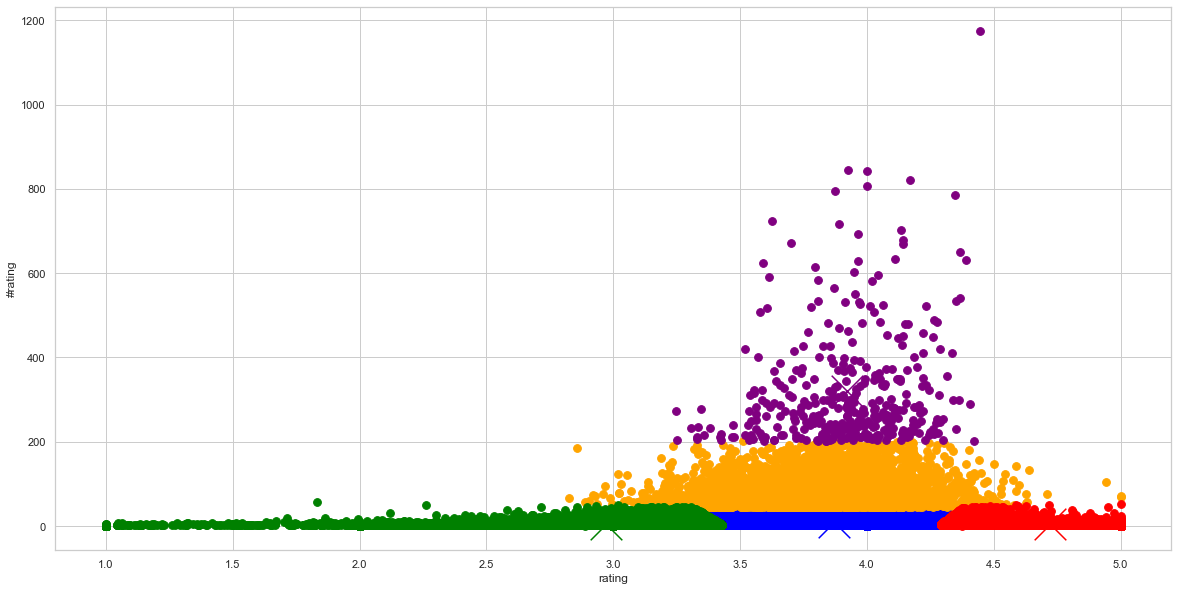

In [39]:
# 2d plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
# 3d plot
# ax = fig.add_subplot(111, projection='3d')
# cetroid plot
centroids = scaler.inverse_transform(km.cluster_centers_)
color = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']
for i, centroid in enumerate(centroids):
    ax.scatter(centroid[0], centroid[1], c=color[i], marker='x', s=1000)
# data plot
for i in range(n_clusters):
    ax.scatter(df.rating[df.label == i],df.no_of_rating[df.label == i], c=color[i], s=60)
plt.xlabel("rating")
plt.ylabel("#rating")
plt.show()

In [48]:
centroids

array([[  3.87109065,   8.40349837],
       [  3.81814235,  80.66366036],
       [  2.97044239,   3.71306777],
       [  4.72181296,   4.96657382],
       [  3.92241936, 321.44662921]])

In [47]:
df.to_csv(OUTPUT_FILE, index=False)

In [ ]:
df['rating_bin'] = pd.cut(df['rating'], bins=8)
rating_df = df.groupby('rating_bin')['rating_bin'].count()